In [32]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [5]:
import tensorflow as tf
fmnist=tf.keras.datasets.fashion_mnist

In [25]:
(x_train, y_train),(x_test, y_test) = fmnist.load_data()

In [22]:
x_train.shape

(60000, 28, 28)

In [10]:
y_train.shape

(60000,)

In [15]:
import pandas as pd
pd.Series(y_train).unique()

array([9, 0, 3, 2, 7, 5, 1, 6, 4, 8], dtype=uint8)

In [16]:
x_train.reshape(x_train.shape,-1)

TypeError: 'tuple' object cannot be interpreted as an integer

In [26]:
import numpy as np
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


In [31]:
#Number of classes
k=len(set(y_train))
print('number of classes: ',k)

number of classes:  10


In [35]:
#Building the model using Functional API
i=Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(k,activation='softmax')(x)

model=Model(i,x)

In [37]:
#Compile and Fit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)
#more epochs performed, say about 15, results in better validation accuracy > 90%

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5488 - accuracy: 0.8049 - val_loss: 0.4312 - val_accuracy: 0.8443
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3991 - accuracy: 0.8509 - val_loss: 0.3806 - val_accuracy: 0.8585
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3571 - accuracy: 0.8656 - val_loss: 0.3723 - val_accuracy: 0.8625
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3397 - accuracy: 0.8723 - val_loss: 0.3631 - val_accuracy: 0.8690
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3197 - accuracy: 0.8800 - val_loss: 0.3621 - val_accuracy: 0.8656


In [45]:
r.history

{'loss': [0.548783004283905,
  0.399071604013443,
  0.3571358621120453,
  0.3397330045700073,
  0.31967785954475403],
 'accuracy': [0.8048999905586243,
  0.8508666753768921,
  0.8656166791915894,
  0.8723000288009644,
  0.8800166845321655],
 'val_loss': [0.43115121126174927,
  0.3806397318840027,
  0.37231752276420593,
  0.3630959689617157,
  0.36211684346199036],
 'val_accuracy': [0.8442999720573425,
  0.8585000038146973,
  0.862500011920929,
  0.8690000176429749,
  0.8655999898910522]}

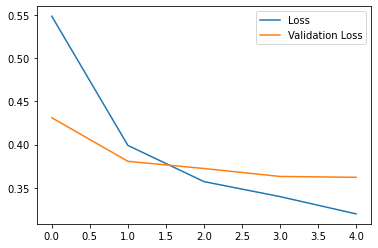

In [51]:
plt.plot(r.history['loss'],label='Loss')
plt.plot(r.history['val_loss'],label='Validation Loss')
plt.legend()

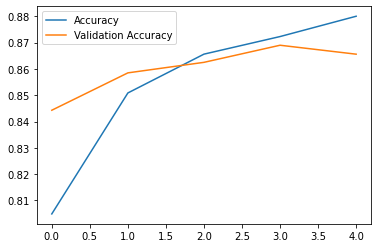

In [50]:
plt.plot(r.history['accuracy'],label='Accuracy')
plt.plot(r.history['val_accuracy'],label='Validation Accuracy')
plt.legend()

In [58]:
from sklearn.metrics import confusion_matrix
p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)

In [62]:
#Copied from https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[847   2  17  40   3   3  84   0   4   0]
 [  3 970   0  18   1   0   7   0   1   0]
 [ 21   0 789  15 112   0  61   0   2   0]
 [ 15   5  12 898  48   0  21   0   1   0]
 [  1   1  86  20 858   0  33   0   1   0]
 [  0   0   0   0   0 964   0  21   0  15]
 [192   0  94  40 191   0 470   0  13   0]
 [  0   0   0   0   0  10   0 947   0  43]
 [  5   0   2   3  11   7  10   3 958   1]
 [  0   0   0   0   0   8   1  36   0 955]]


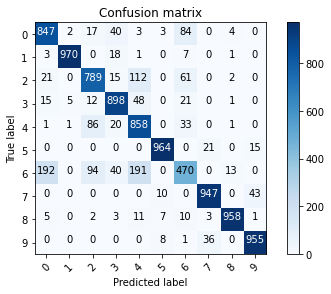

In [63]:
plot_confusion_matrix(cm,list(range(10)))